In [1]:
### Please ignore the warning messages due to duplicate methods
library(readxl)
library(dplyr)
library(lubridate)
library(ggplot2)
library(tseries)
library(forecast)
library(TTR)
library(zoo)
library(xts)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.fracdiff    fracdiff
  residuals.fracdiff fracdiff

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Attaching package: 'xts'

The following objects are masked from 'package:dplyr':

    first, last



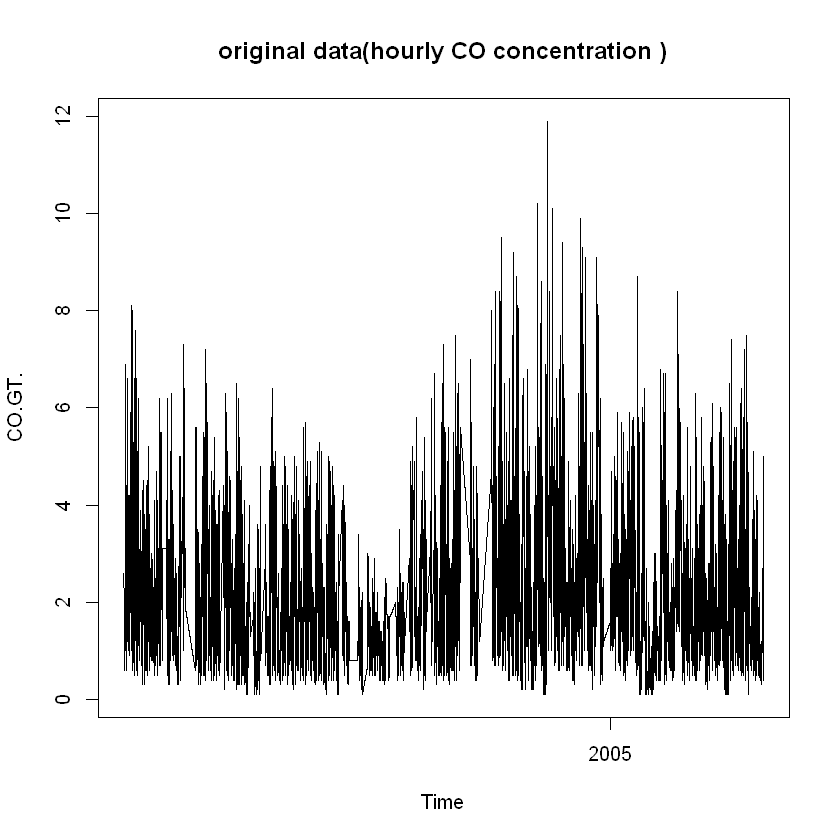

In [2]:
### Read the excel file
airquality<-read_excel("C:\\Users\\poonam\\Downloads\\AirQualityUCI\\AirQualityUCI.xlsx")
#airquality
### add the data to dataframe for manipulation
a<-data.frame(airquality)
#a
### Selecled the few columns(date, time and co) from the data frame 
df_co<-select(a,Date,Time,CO.GT.)
#df_co
testdata <- df_co
### manipulation of time columns( chose hour)
testdata1 <- mutate(testdata, Time = hour(testdata$Time))
testdata2 <- mutate(testdata1, date2 = update(testdata1$Date,hour = testdata1$Time))
#testdata2
cleanedset1 <- select(testdata2, date2, CO.GT.)
cleanedset1$CO.GT.[cleanedset1$CO.GT. == -200] <- NA
z <- zoo(select(cleanedset1,CO.GT.))
x <- na.fill(z, "extend")
b <- data.frame(x)
colnames(b) <- c("hourly averaged concentration CO")
cleanset2=cbind(cleanedset1,b)
cleanset3 = select(cleanset2,date2,'hourly averaged concentration CO')
x3.index <- select(cleanset3,date2)
x3.data <- select(cleanset3,'hourly averaged concentration CO')
x4 <-zoo(x3.data,x3.index$date2)
plot(x4,main="original data(hourly CO concentration )",xlab="Time",ylab="CO.GT.")

In [3]:
## 12 hours data 
ep_12hours <- endpoints(x4,'hours',12)
result_12hours <- period.apply(x4,INDEX = ep_12hours,FUN = mean)
df_result_12hours <- as.data.frame(result_12hours)
head(df_result_12hours)

,result_12hours
2004-03-10 23:00:00,1.966667
2004-03-11 11:00:00,1.187500
2004-03-11 23:00:00,3.158333
2004-03-12 11:00:00,1.937500
2004-03-12 23:00:00,3.575000
2004-03-13 11:00:00,2.220833


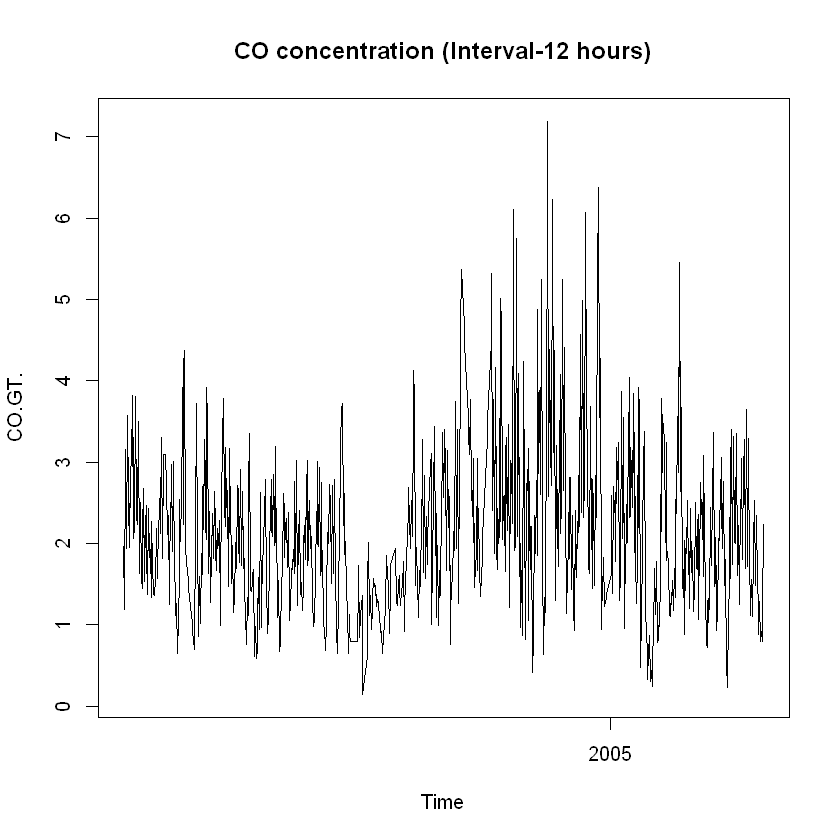

In [4]:
plot(result_12hours,main="CO concentration (Interval-12 hours)",xlab="Time",ylab="CO.GT.")


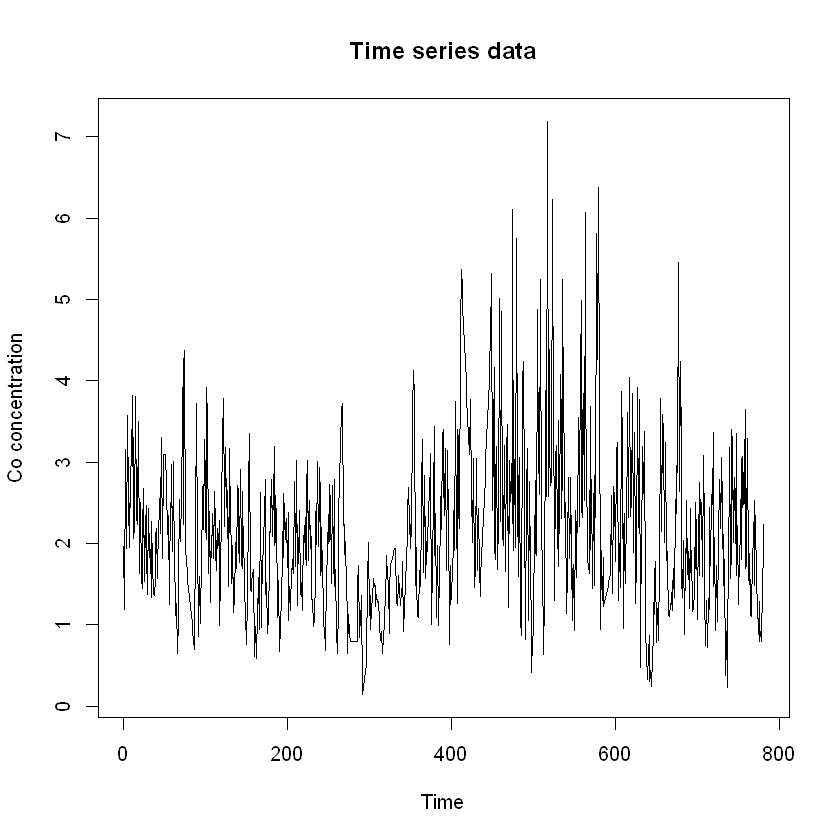

In [5]:
### convert the data to time series
colnames(df_result_12hours)<-c("co")
series<-ts(df_result_12hours)
plot(series,main="Time series data",ylab="Co concentration")

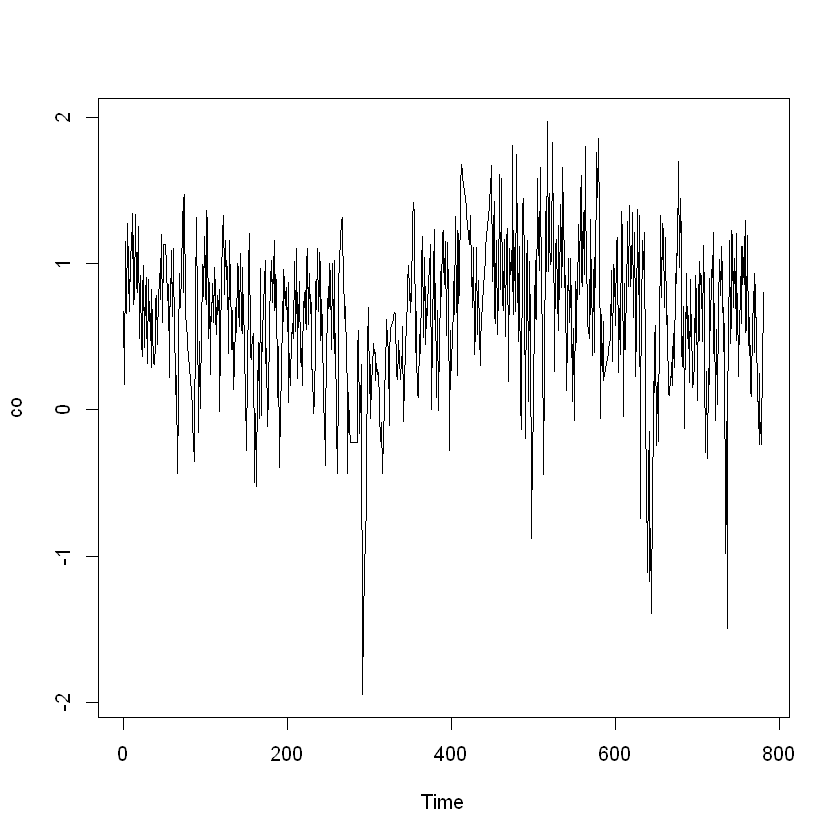

In [6]:
### Make the data stationary
### log of data to stabilize non-constant variance
plot(log(series))

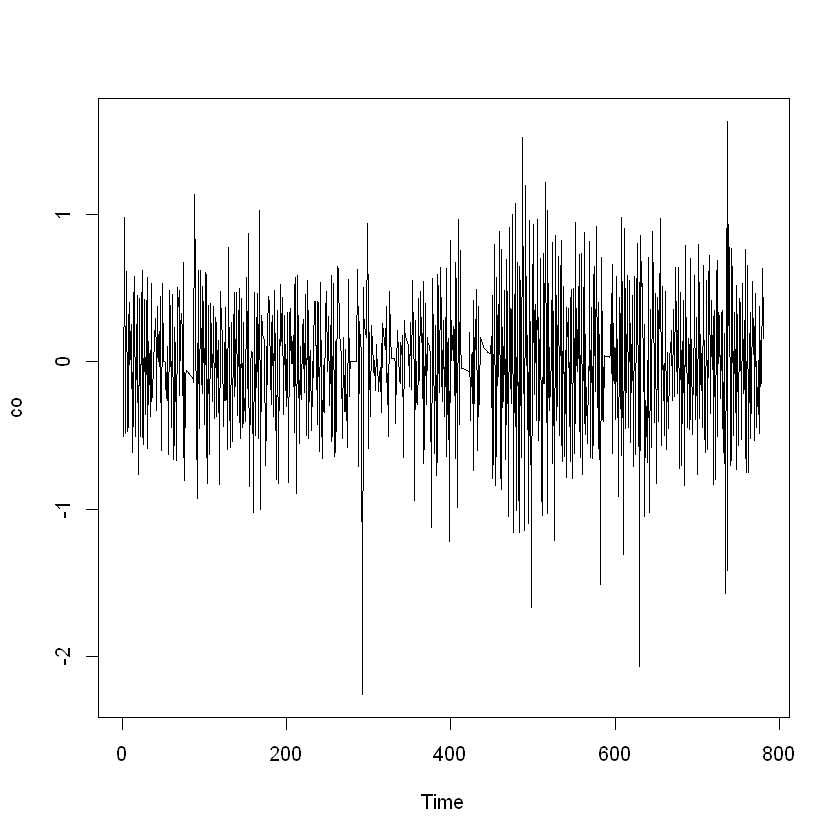

In [7]:
### Make the mean constant
plot(diff(log(series)))

In [8]:
###Dickey-Fuller Tests to check  data stationarity
adf_test<-adf.test(diff(log(series))[,1],alternative='stationary')
print(adf_test)


Warning message in adf.test(diff(log(series))[, 1], alternative = "stationary"):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  diff(log(series))[, 1]
Dickey-Fuller = -13.052, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary



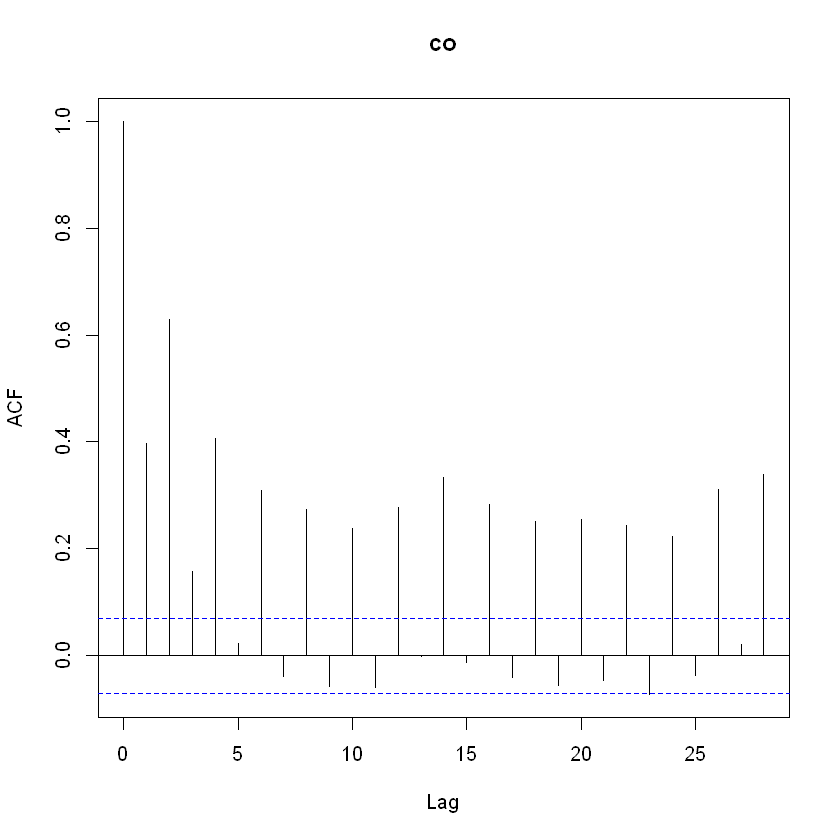

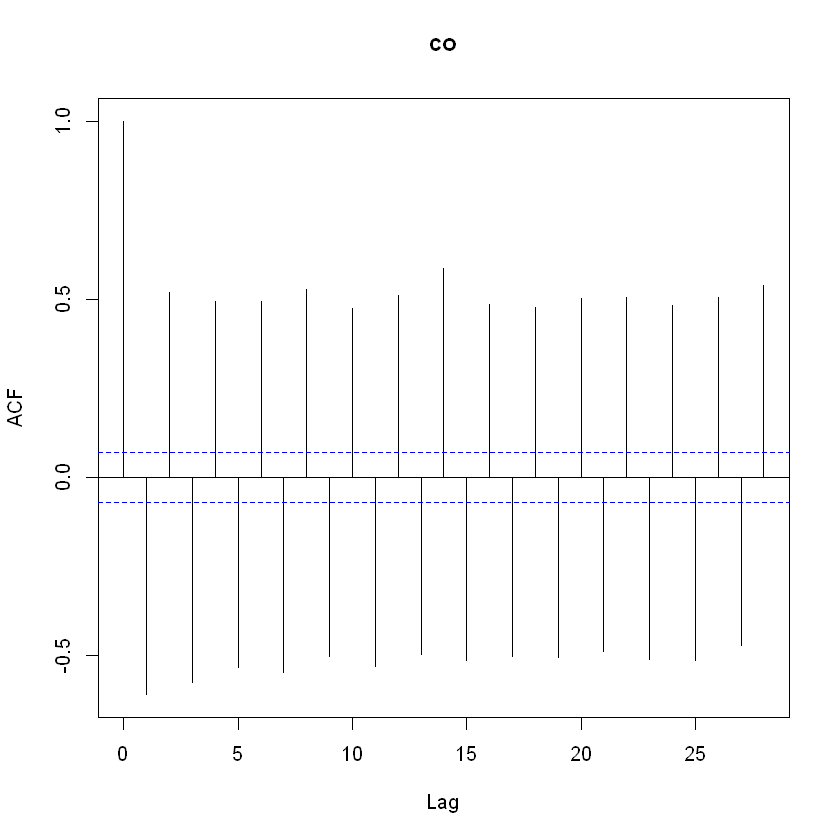

Series: series 
ARIMA(5,1,1) 

Coefficients:
         ar1     ar2      ar3     ar4      ar5      ma1
      0.3752  0.4367  -0.2986  0.1842  -0.1531  -0.9684
s.e.  0.0365  0.0378   0.0390  0.0378   0.0361   0.0105

sigma^2 estimated as 0.5383:  log likelihood=-863.5
AIC=1741   AICc=1741.14   BIC=1773.61


 Fitting models using approximations to speed things up...

 ARIMA(2,1,2) with drift         : Inf
 ARIMA(0,1,0) with drift         : 2420.432
 ARIMA(1,1,0) with drift         : 1914.996
 ARIMA(0,1,1) with drift         : 2073.335
 ARIMA(0,1,0)                    : 2418.432
 ARIMA(2,1,0) with drift         : 1882.62
 ARIMA(3,1,0) with drift         : 1824.491
 ARIMA(4,1,0) with drift         : 1826.207
 ARIMA(3,1,1) with drift         : 1767.729
 ARIMA(2,1,1) with drift         : Inf
 ARIMA(4,1,1) with drift         : 1765.77
 ARIMA(5,1,1) with drift         : 1740.737
 ARIMA(5,1,0) with drift         : 1789.754
 ARIMA(5,1,2) with drift         : Inf
 ARIMA(4,1,2) with drift         : Inf
 ARIMA(5,1,1)                    : 1738.834
 ARIMA(4,1,1)                    : 1764.155
 ARIMA(5,1,0)                    : 1787.76
 ARIMA(5,1,2)                    : Inf
 ARIMA(4,1,0)                    : 1824.211
 ARIMA(4,1,2)                    : Inf

 Now re-fitting the best model(s) without appro

Series: series 
ARIMA(5,1,1) 

Coefficients:
         ar1     ar2      ar3     ar4      ar5      ma1
      0.3752  0.4367  -0.2986  0.1842  -0.1531  -0.9684
s.e.  0.0365  0.0378   0.0390  0.0378   0.0361   0.0105

sigma^2 estimated as 0.5383:  log likelihood=-863.5
AIC=1741   AICc=1741.14   BIC=1773.61

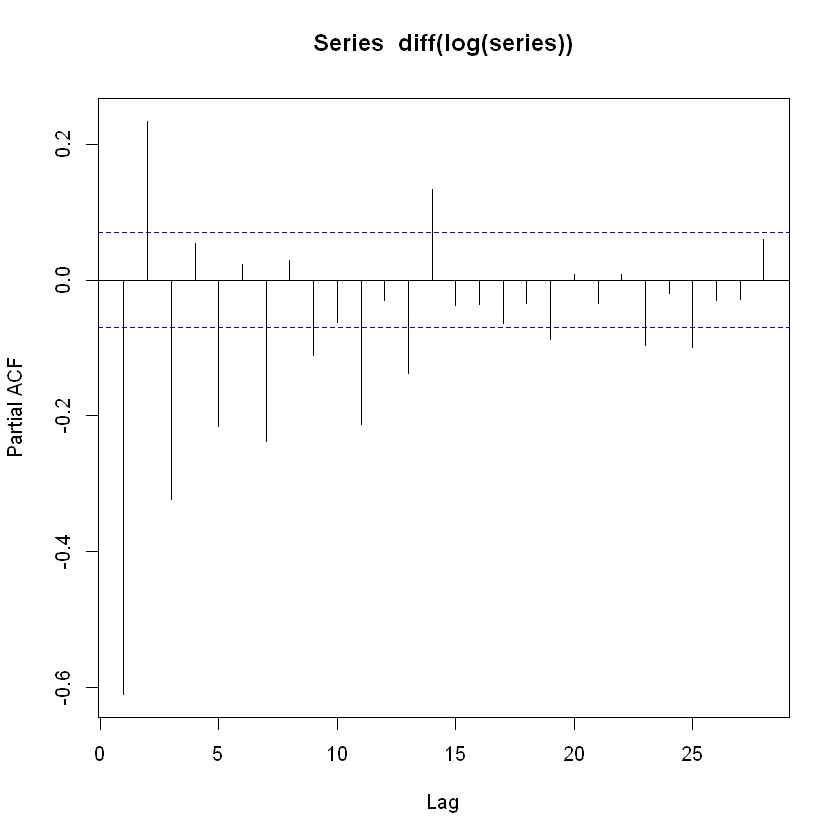

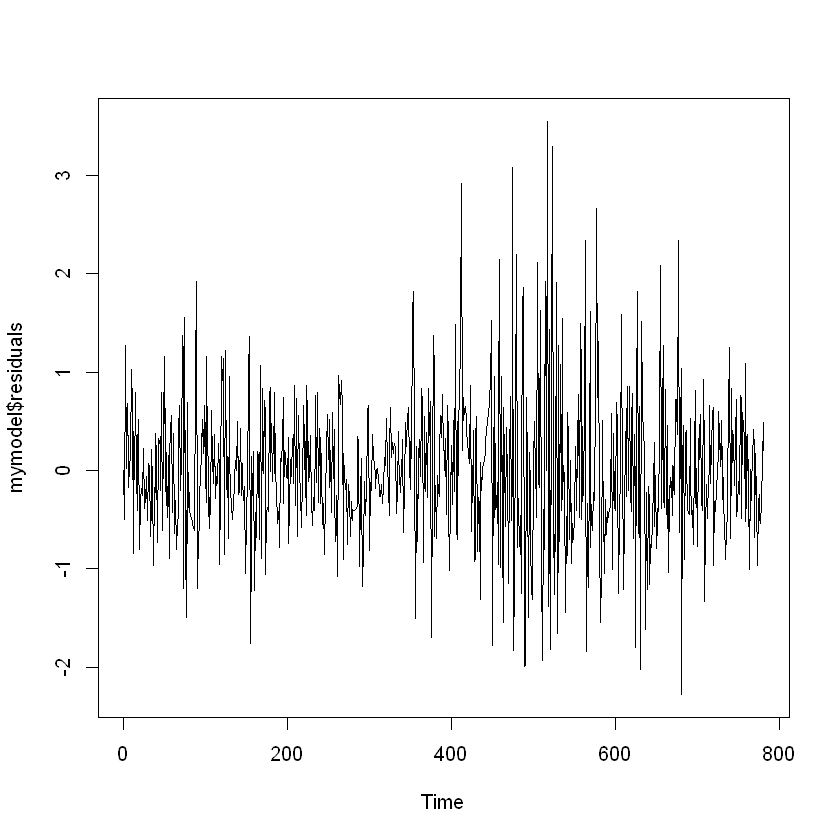

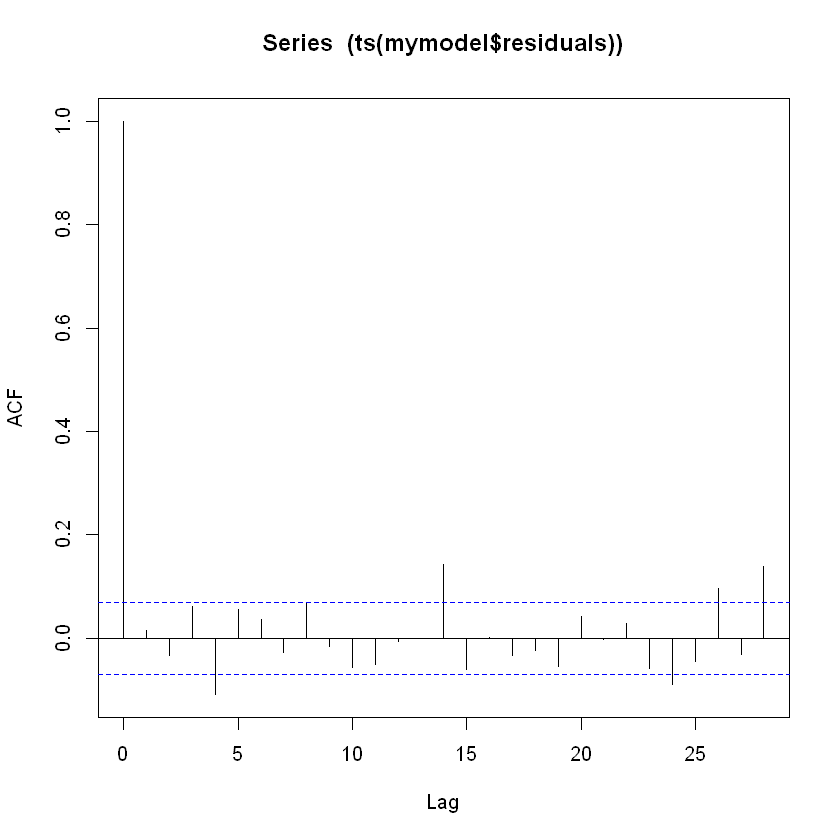

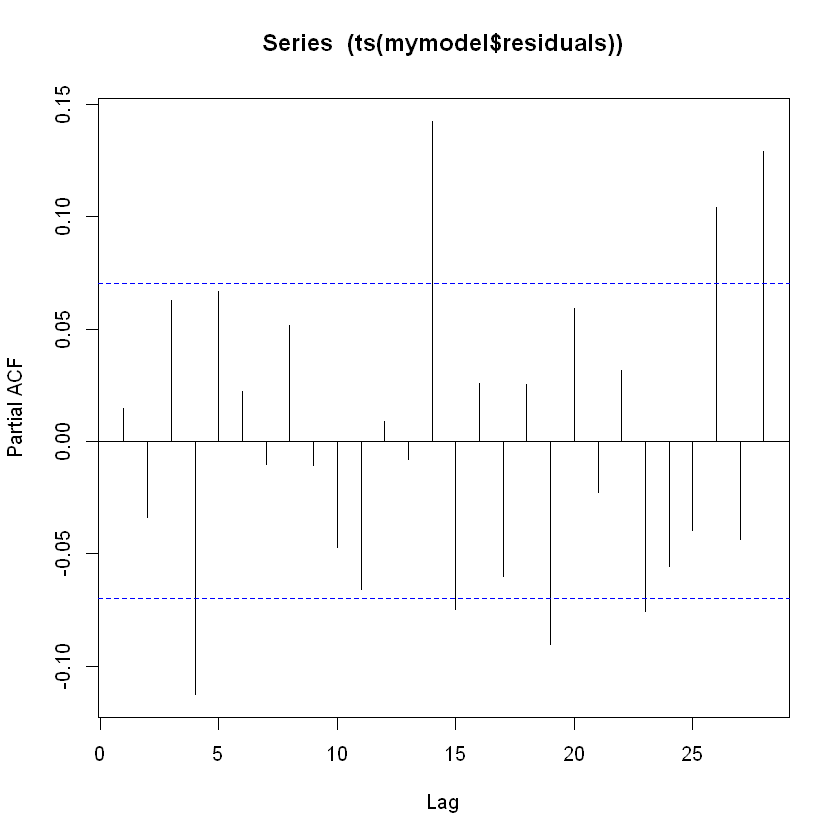

In [9]:
###  ARIMA Model
### Auto correlation factor on non stationary data
acf(series)

### Auto correlation factor on stationary data
###ACF is a plot of total correlation between different lag functions.
acf(diff(log(series)))

### Partial auto correlation factor on stationary data
pacf(diff(log(series)))

### ARIMA model
mymodel<-auto.arima(series)
mymodel

### to see possible combination of p,d,q
auto.arima(series,ic="aic",trace=TRUE)

### plot the model
plot.ts(mymodel$residuals)
acf((ts(mymodel$residuals)))
pacf((ts(mymodel$residuals)))

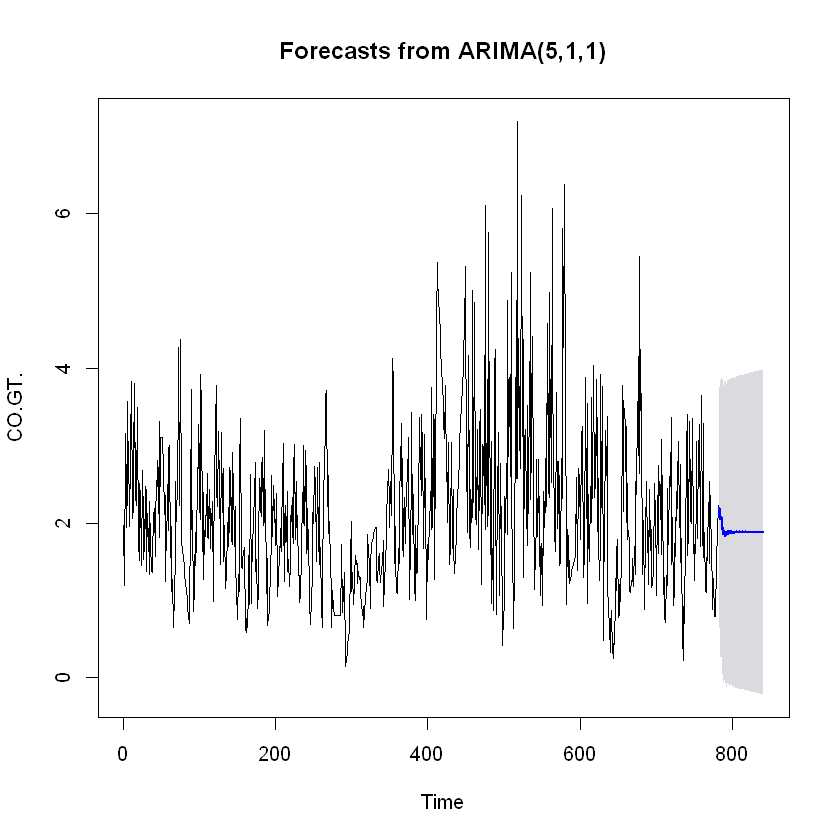

In [10]:
############## forcast the model
myforecast<-forecast(mymodel,level=c(95),h=60)
plot(myforecast,xlab="Time",ylab="CO.GT.")

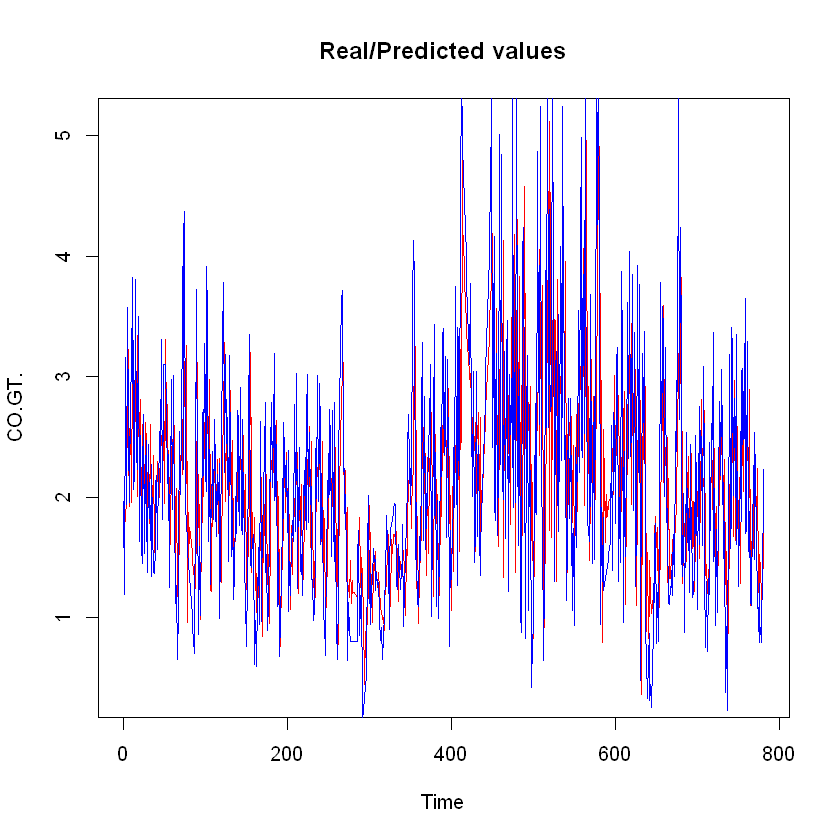

In [11]:
############### line plot of real values and predicted values
predict_val=fitted(myforecast)
original_val=series
plot(predict_val,col="red",main="Real/Predicted values",ylab="CO.GT.")
lines(series,col="blue")

In [12]:
### Accuracy measures of model
accuracy(myforecast)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-0.006478118,0.7304145,0.5456397,-14.79114,32.95592,0.6315684,0.01452055


In [13]:
################ Correlation between real values and predicted values
res<-cor.test(predict_val,original_val,method="pearson")
res


	Pearson's product-moment correlation

data:  predict_val and original_val
t = 28.168, df = 779, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6737746 0.7434551
sample estimates:
      cor 
0.7103511 
